In [1]:
from Starts.startml import *
from Starts.startvis import *
from Starts.startmodrec import *
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

local_kwargs {'data_path_1': '9_RECS/rating_final.csv', 'data_path_2': '9_RECS/chefmozcuisine.csv', 'data_path_3': '', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
rating_final = train_data
userpayment = pd.read_csv("9_RECS/userpayment.csv")
userprofile = pd.read_csv("9_RECS/userprofile.csv")
usercuisine = pd.read_csv("9_RECS/usercuisine.csv")

chefmozcuisine = nonan_data
chefmozaccepts = pd.read_csv("9_RECS/chefmozaccepts.csv")
chefmozhours4 = pd.read_csv("9_RECS/chefmozhours4.csv")
chefmozparking = pd.read_csv("9_RECS/chefmozparking.csv")

geoplaces2 = pd.read_csv("9_RECS/geoplaces2.csv", encoding = "ISO-8859-1")


In [3]:
userprofile.columns, userpayment.columns, usercuisine.columns

(Index(['userID', 'latitude', 'longitude', 'smoker', 'drink_level',
        'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos',
        'birth_year', 'interest', 'personality', 'religion', 'activity',
        'color', 'weight', 'budget', 'height'],
       dtype='object'),
 Index(['userID', 'Upayment'], dtype='object'),
 Index(['userID', 'Rcuisine'], dtype='object'))

In [4]:
len(userprofile), len(userpayment), len(usercuisine)

(138, 177, 330)

In [5]:
rating_user = StartML.merge_df([rating_final, userprofile, userpayment, usercuisine], feature='userID')
len(rating_user.columns), type(rating_user)
rating_user.columns

Index(['userID', 'Rcuisine', 'Upayment', 'latitude', 'longitude', 'smoker',
       'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'hijos', 'birth_year', 'interest', 'personality',
       'religion', 'activity', 'color', 'weight', 'budget', 'height',
       'placeID', 'rating', 'food_rating', 'service_rating'],
      dtype='object')

In [6]:
StartML.nan_columns(rating_user)

['Upayment']

In [7]:
rating_user['Upayment'].unique()

array(['cash', 'bank_debit_cards', 'MasterCard-Eurocard', 'VISA', nan,
       'American_Express'], dtype=object)

In [8]:
StartML.nan_columns(rating_user)

['Upayment']

In [9]:
# replace nan_value by 'Unknown'
StartML.process_nan_simply(rating_user)
StartML.nan_columns(rating_user)

[]

In [10]:
rating_user['Upayment'].unique()

array(['cash', 'bank_debit_cards', 'MasterCard-Eurocard', 'VISA',
       'Unknown', 'American_Express'], dtype=object)

In [11]:
chefmoz = StartML.merge_df([chefmozcuisine, chefmozaccepts, chefmozhours4, chefmozparking], feature='placeID')
chefmoz.columns

Index(['placeID', 'parking_lot', 'hours', 'days', 'Rpayment', 'Rcuisine'], dtype='object')

In [12]:
for item in [geoplaces2, chefmozcuisine, chefmozaccepts, chefmozhours4, chefmozparking]:
    print(StartML.nan_columns(item))

[]
[]
[]
[]
[]


In [13]:
# find columns with NaN values in new data
StartML.nan_columns(chefmoz)

['hours', 'days', 'Rpayment', 'Rcuisine']

### Notice: Merging data frames might cause new NaN values

In [14]:
StartML.nan_columns(geoplaces2)

[]

In [15]:
user_lalo = rating_user[['latitude', 'longitude']].drop_duplicates()
len(user_lalo)

128

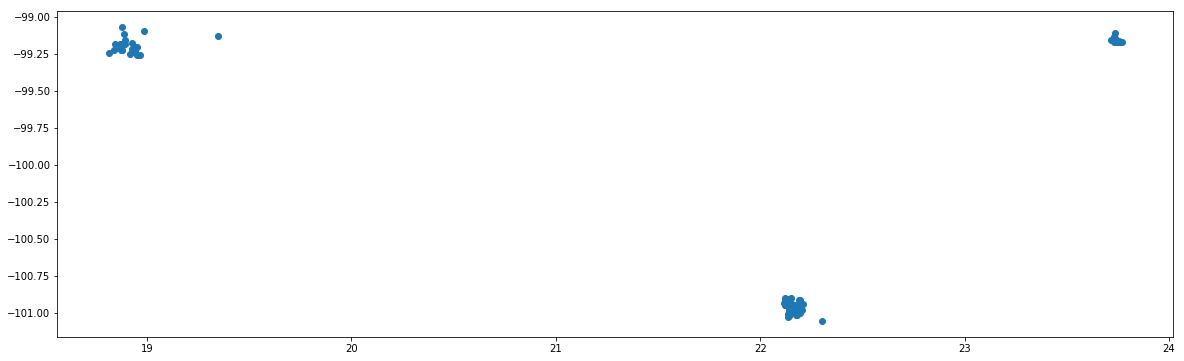

In [16]:
plt.scatter(user_lalo['latitude'], user_lalo['longitude'])

In [17]:
user_lalo.head()

,latitude,longitude
0,22.139997,-100.978803
9,22.150087,-100.983325
19,22.119847,-100.946527
32,18.867000,-99.183000
176,22.183477,-100.959891


### Recommendation System with nearest neighbors

In [18]:
# find nearest neighbors of index 0
pop = StartModREC.find_nearest_neighbors_by_distance(user_lalo, [0], manhattan=True)
pop

,distance
idx,
97,0.009658
52,0.012172
101,0.012286
51,0.014147
5,0.014200


In [19]:
# apply Euclidean distance
pop2 = StartModREC.find_nearest_neighbors_by_distance(user_lalo, [9], manhattan=False)
pop2

,distance
idx,
5,0.000336
97,0.005284
28,0.005999
43,0.006704
71,0.006755


In [20]:
# Find index which is not given in data, exception ValueError is being caught.
pop3 = StartModREC.find_nearest_neighbors_by_distance(user_lalo, [1])
pop3

ValueError, index  [1] does not exist


SystemExit: 1

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
